In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy

In [2]:
# copied from emission/analysis/modelling/tour_model/similarity.py
# by shankari on 26 Jan 2020
#create the histogram
def graph(self):
    matplotlib.use('Agg')
    bars = [0] * len(self.bins)
    for i in range(len(self.bins)):
        bars[i] = len(self.bins[i])
    N = len(bars)
    index = numpy.arange(N)
    width = .2
#     fig = plt.figure()
    plt.bar(index+width, bars, color='k')
    try:
        plt.bar(self.num+width, bars[self.num], color='r')
    except Exception as e:
        # log an error on any exception instead of ignoring it silently
        print("Got error %s while plotting " % e)
    plt.vlines(self.num, 0, max(bars))
    plt.xlim([0, N])
    plt.xlabel('Bins')
    plt.ylabel('Number of elements')
#     return fig

In [3]:
import emission.storage.timeseries.abstract_timeseries as esta

In [4]:
# copied from the model_stage
long_term_uuid_list = esta.TimeSeries.get_uuid_list()

storage not configured, falling back to sample, default configuration
Connecting to database URL localhost


In [5]:
# we should really plot this for all the uuids, but let's start with one at a time
first_uuid = long_term_uuid_list[0]

In [6]:
import emission.analysis.modelling.tour_model.cluster_pipeline as eamtc

In [7]:
data = eamtc.read_data(first_uuid)

In [8]:
# we should experiment with different values here
radius = 300

In [9]:
import emission.analysis.modelling.tour_model.similarity as similarity

In [10]:
sim = similarity.similarity(data, radius)

In [11]:
sim.bin_data()

In [12]:
sim.calc_cutoff_bins()

In [13]:
graph(sim)


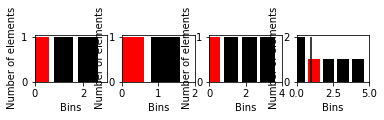

In [14]:
fig=plt.figure(1)
n = len(long_term_uuid_list)
for i in range(n):
    plt.subplot(n,n,i+1)
    data = eamtc.read_data(long_term_uuid_list[i])
    radius = 300
    sim = similarity.similarity(data, radius)
    sim.bin_data()
    sim.calc_cutoff_bins()
    
    graph(sim)
fig

In [15]:
# #second sulotion
# fig = plt.figure()
# for i in range(len(long_term_uuid_list)):
#     ax = fig.add_subplot(2,2,i+1)
#     data = eamtc.read_data(long_term_uuid_list[i])
#     radius = 300
#     sim = similarity.similarity(data, radius)
#     sim.bin_data()
#     sim.calc_cutoff_bins()
#     graph(sim)

# fig